# Predicting TelCo Customer Churn

This project explores 7043 customers using 21 different features to find ways to predict and reduce churn.

## 1. Load and preview data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math


In [2]:
data = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


It should be noted that analyzing the above, the SeniorCitizen feature is considered int64, when in reality the datapoints are all 1 or 0 to indicate true or false, may be worth changing the data type during our EDA phase.

We also have TotalCharges which is just considered an object when in reality it should be considered a float64, may be worth looking into why that is

There are also no clear null values, but during conversion we should make sure that there are no hidden nulls

## Data Validation

### Encoding senior citizen data as a boolean

In [4]:
data["SeniorCitizen"] = data["SeniorCitizen"].astype('bool')
data.SeniorCitizen.head

<bound method NDFrame.head of 0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: SeniorCitizen, Length: 7043, dtype: bool>

In [5]:
data.SeniorCitizen.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: SeniorCitizen
Non-Null Count  Dtype
--------------  -----
7043 non-null   bool 
dtypes: bool(1)
memory usage: 7.0 KB


All seems to have worked in our first conversion

In [6]:
len(data.customerID.unique())

7043

No duplicate customers

### Encoding Total Charges as a float

In [7]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")  # Coerces so we can handle the rest of the null data seperately

In [8]:
data[data["TotalCharges"].isnull()] # Figure out which rows have a null value in their total charges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,False,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,False,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,False,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


What we find is that all of the rows that contain a null value for their Total Charges, also have 0 tenure, likely meaning that they've simply racked up no charges and that's where the error is coming from, so we should be safe to fillNA with 0.0

In [9]:
data["TotalCharges"] = data["TotalCharges"].fillna(0.0)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   bool   
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Properly casting all the other types

Considering that all the other generic object type features are categorical features, we should cast them as strings

In [11]:
data[["tenure"]] = data[["tenure"]].astype(int)

In [12]:
numeric_features = ["tenure", "MonthlyCharges", "TotalCharges"]
non_categorical_features = numeric_features
categorical_features = data.drop(non_categorical_features, axis= 1).columns
data[categorical_features] = data[categorical_features].astype("string")
categorical_features = categorical_features[:-1]
target = "Churn"

In [13]:
categorical_features

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   gender            7043 non-null   string 
 2   SeniorCitizen     7043 non-null   string 
 3   Partner           7043 non-null   string 
 4   Dependents        7043 non-null   string 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   string 
 7   MultipleLines     7043 non-null   string 
 8   InternetService   7043 non-null   string 
 9   OnlineSecurity    7043 non-null   string 
 10  OnlineBackup      7043 non-null   string 
 11  DeviceProtection  7043 non-null   string 
 12  TechSupport       7043 non-null   string 
 13  StreamingTV       7043 non-null   string 
 14  StreamingMovies   7043 non-null   string 
 15  Contract          7043 non-null   string 
 16  PaperlessBilling  7043 non-null   string 


### Checking for associations between features

I want to ensure that total charges isn't just tenure * monthly charges as I assume it might be

In [15]:
print(np.mean((np.abs(data.tenure * data.MonthlyCharges - data.TotalCharges))/data.TotalCharges) * 100)

3.2147930013405186


There is an average relative error of 3.2%, thus though tenure * monthly charges is near to total charges, it seems to not be the same datapoint which is quite interesting. For now we will therefore leave all features in

## Data Exploration

### Exploring Cardinality

First step is to analyze the cardinality of the different features to determine if we may need to create grouping to help with interprability and other possible things we may find

In [16]:
data.apply(pd.Series.nunique)

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

What we find is relatively expected, customerID has the same cardinality as the size of our dataset, because customerID is a unique identifier, one **we should drop** as it could lead to overfitting

We find that all other non-numeric features are low enough in cardinality that additional groupings are unlikely to be necessary

## Univariate Distribution Analysis

In [17]:
### Displaying numeric distributions

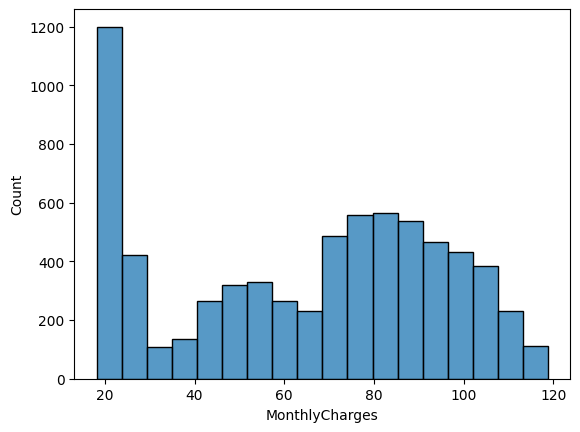

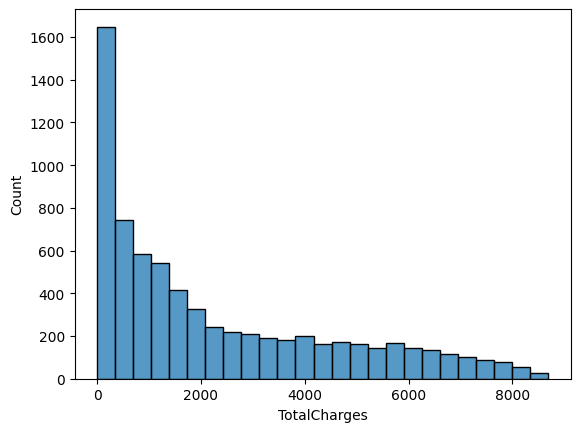

In [18]:
g = sns.histplot(x=data["MonthlyCharges"], data=data)
plt.show()

g = sns.histplot(x=data["TotalCharges"], data=data)
plt.show()


The monthly charges are heavily right skewed and dominated by 0s which may be hiding structure, so let's plot them transformed by log(x + 1) to see if it shows us any hidden structure

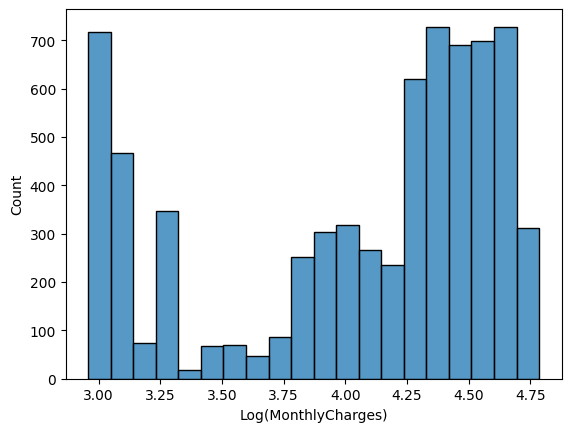

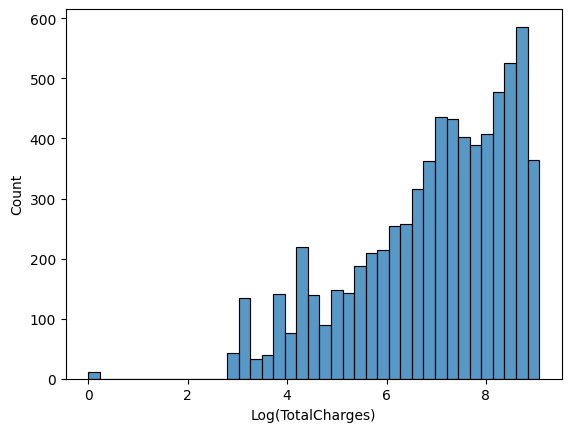

In [19]:
g = sns.histplot(x=np.log1p(data["MonthlyCharges"]), data=data)
g.set_xlabel("Log(MonthlyCharges)")
plt.show()

g = sns.histplot(x=np.log1p(data["TotalCharges"]), data=data)
g.set_xlabel("Log(TotalCharges)")
plt.show()

Given the loss of interpretability with very little hidden structure revealed, we will not transform our data

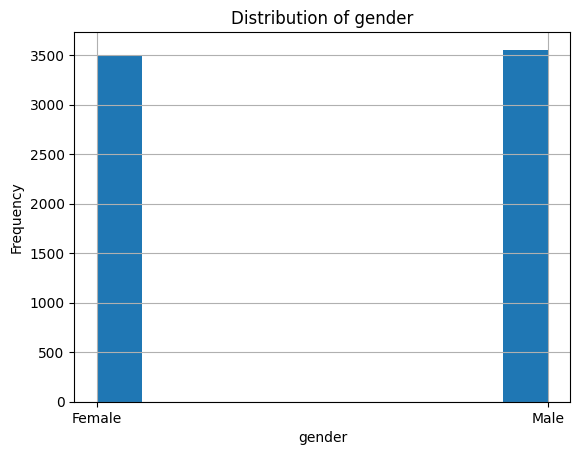

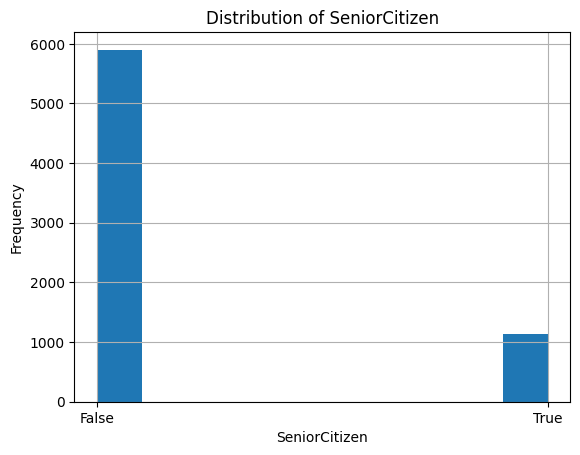

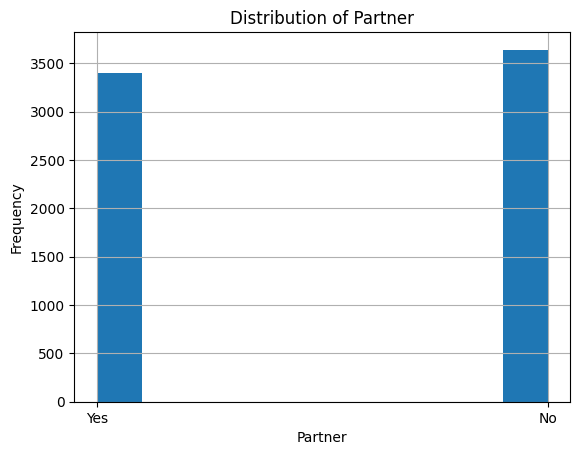

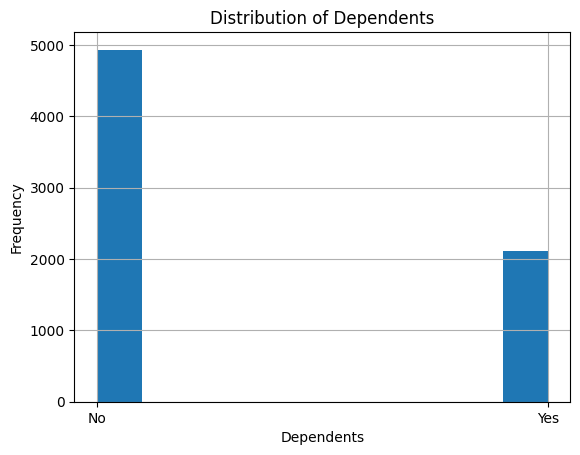

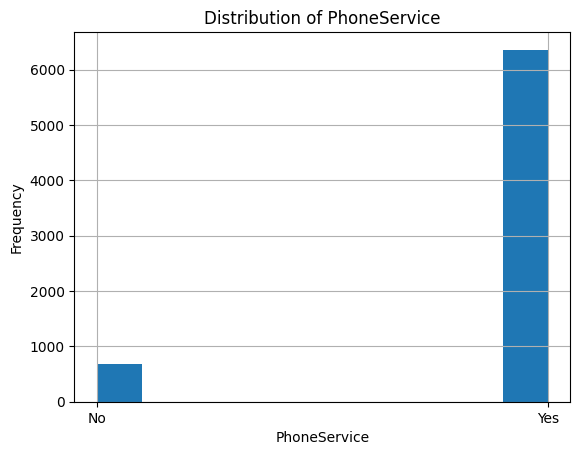

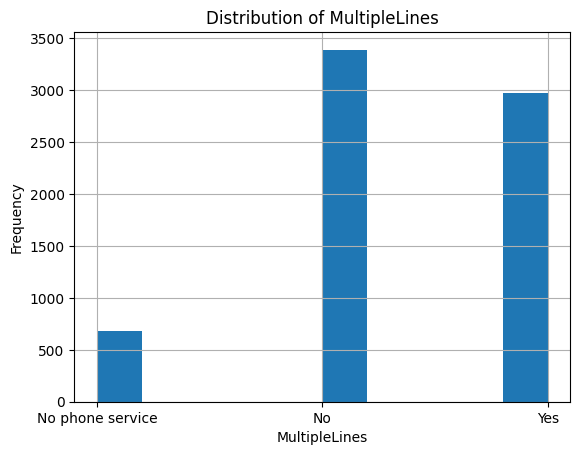

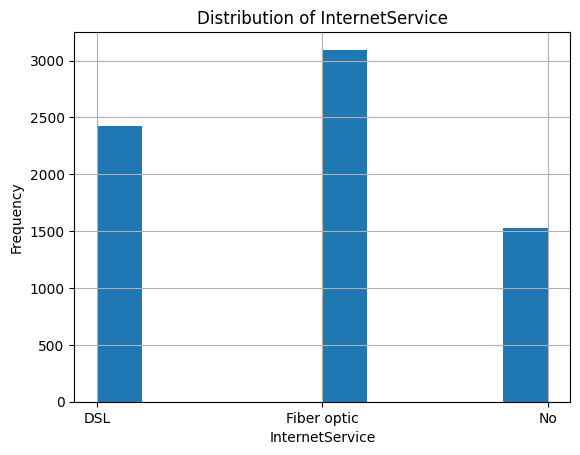

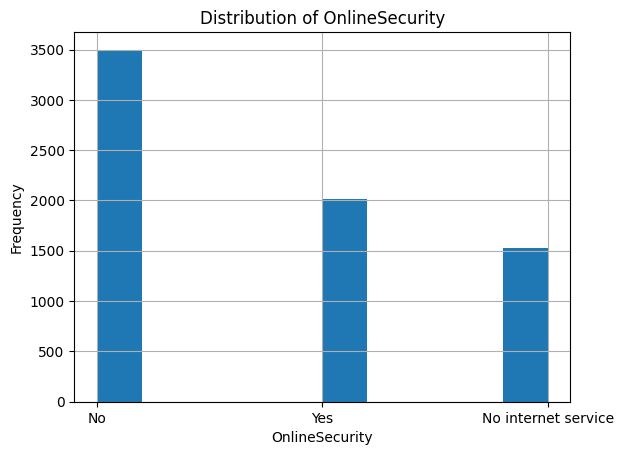

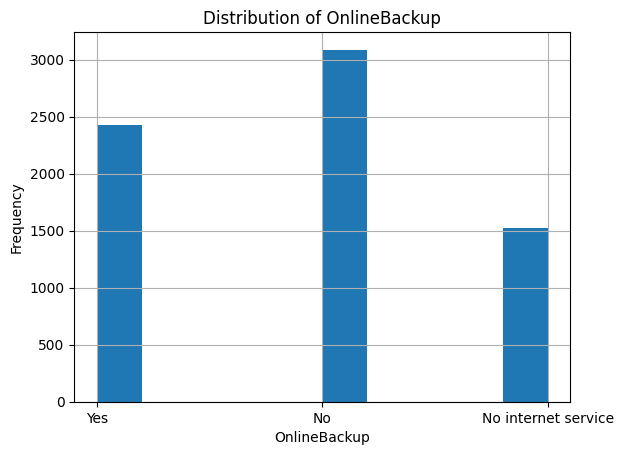

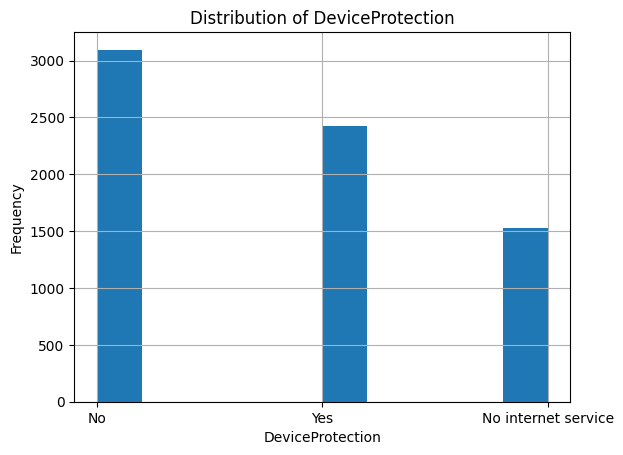

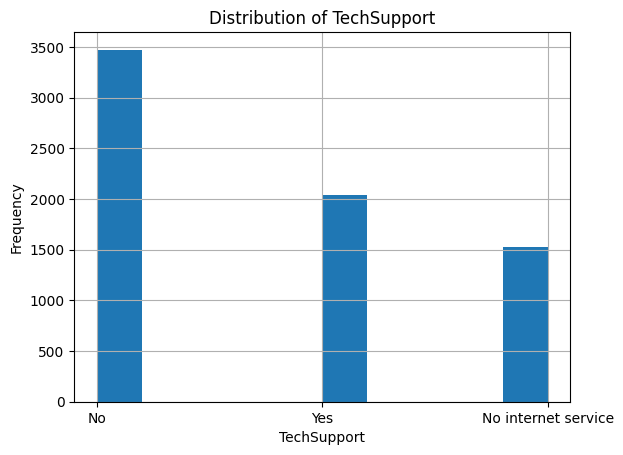

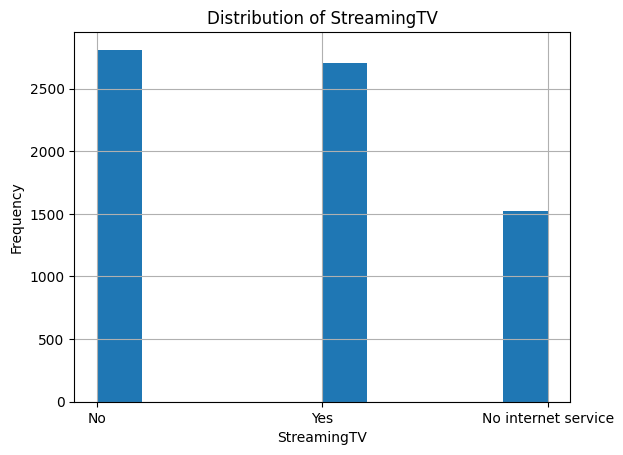

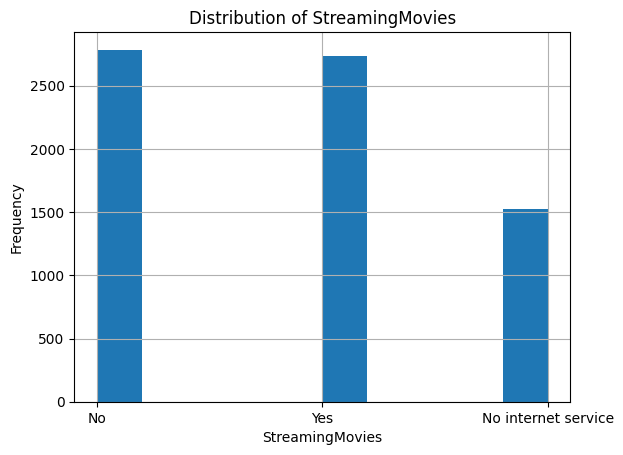

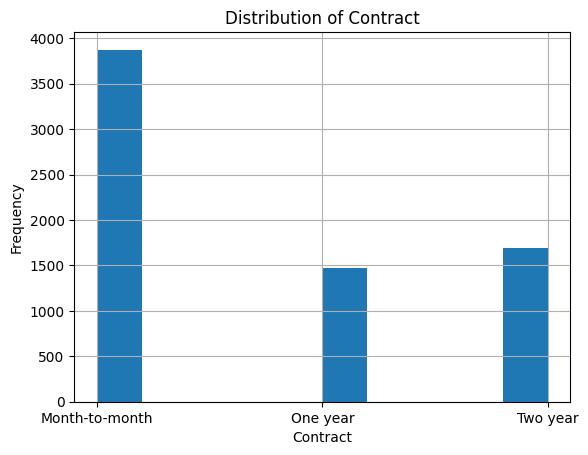

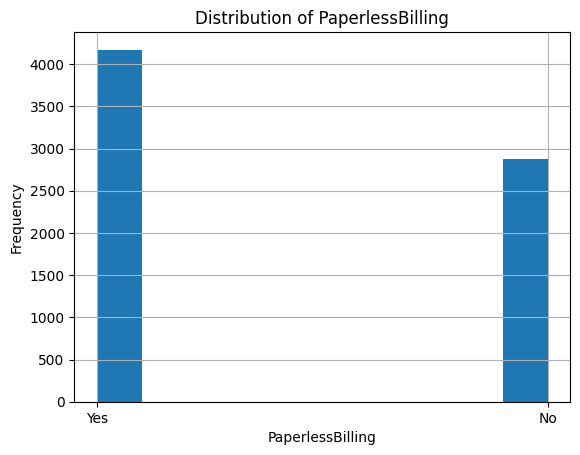

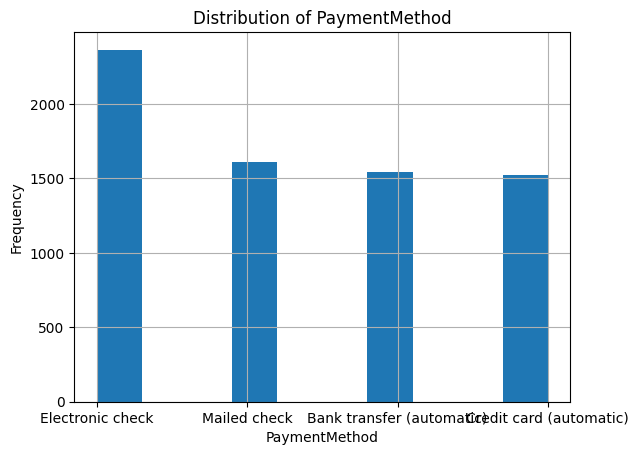

In [20]:
for col in categorical_features[1:]:
    plt.figure()
    data[col].hist()
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

Nothing stands out in the categorical distributions

## Outlier Analysis

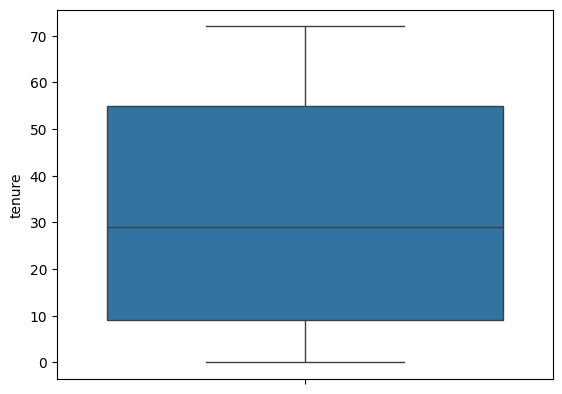

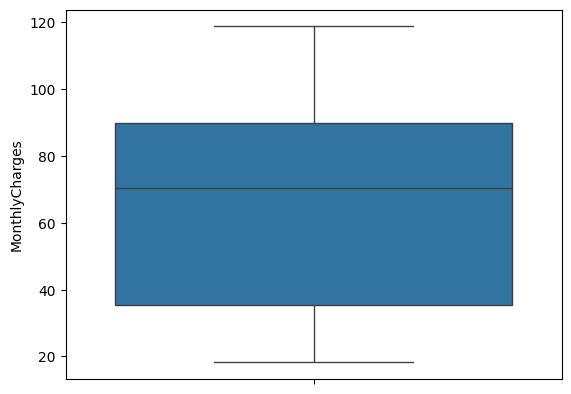

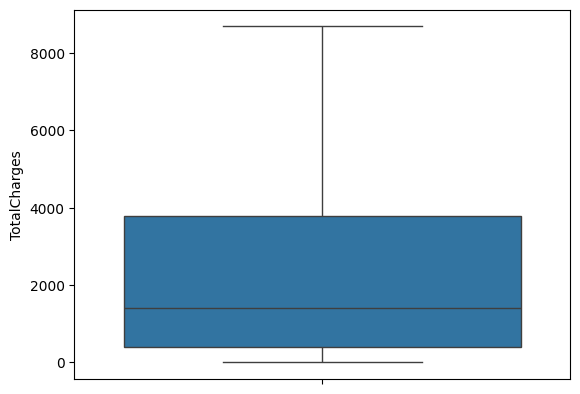

In [21]:
for col in numeric_features:
    sns.boxplot(data[col], fliersize=1)
    plt.show()

We find no obvious outliers through our boxplots

## Feature - Target Relationship

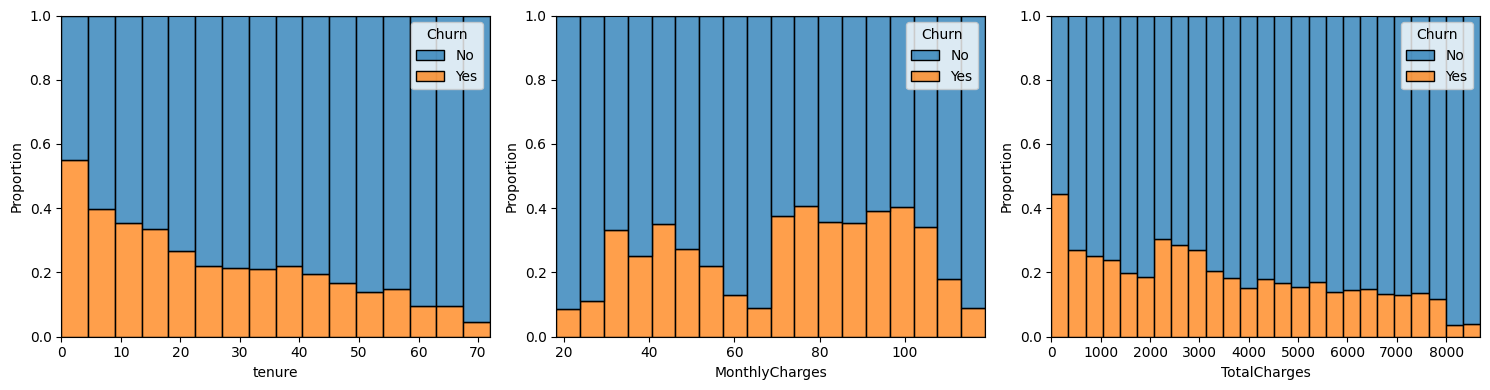

In [22]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=len(numeric_features),
    figsize=(5 * len(numeric_features), 4),
    
)

for ax, feature in zip(axes, numeric_features):
    sns.histplot(x=feature, hue=target, ax=ax, data=data, multiple="fill")
    ax.set_ylabel("Proportion")

fig.tight_layout()
plt.show()

It seems like both tenure and total charges have an impact on churn rates, with tenure having a large negative impact on churn. Monthly charges is too hard to tell, it does seem to have a bimodal distribution but it is a little sporatic

The tenure having a negative impact on churn is to be expected and also a positive sign.

The bimodal distribution shown in monthly charges is deeply interesting, I imagine there is likely a confounding variable impacting the monthly charges and their impact on churn, such as perhaps whether or not they have internet service which **I assume** is more expensive than simply phone service, and thus the first hump in churn represents those on just the phone service plan, and the second hump represents those who also have internet service + those with both. That confounding may also be contract length, with shorter contract lengths being the second hump and the first hump being those with longer contracts.

These are worthwhile interaction effects to examine in a future section

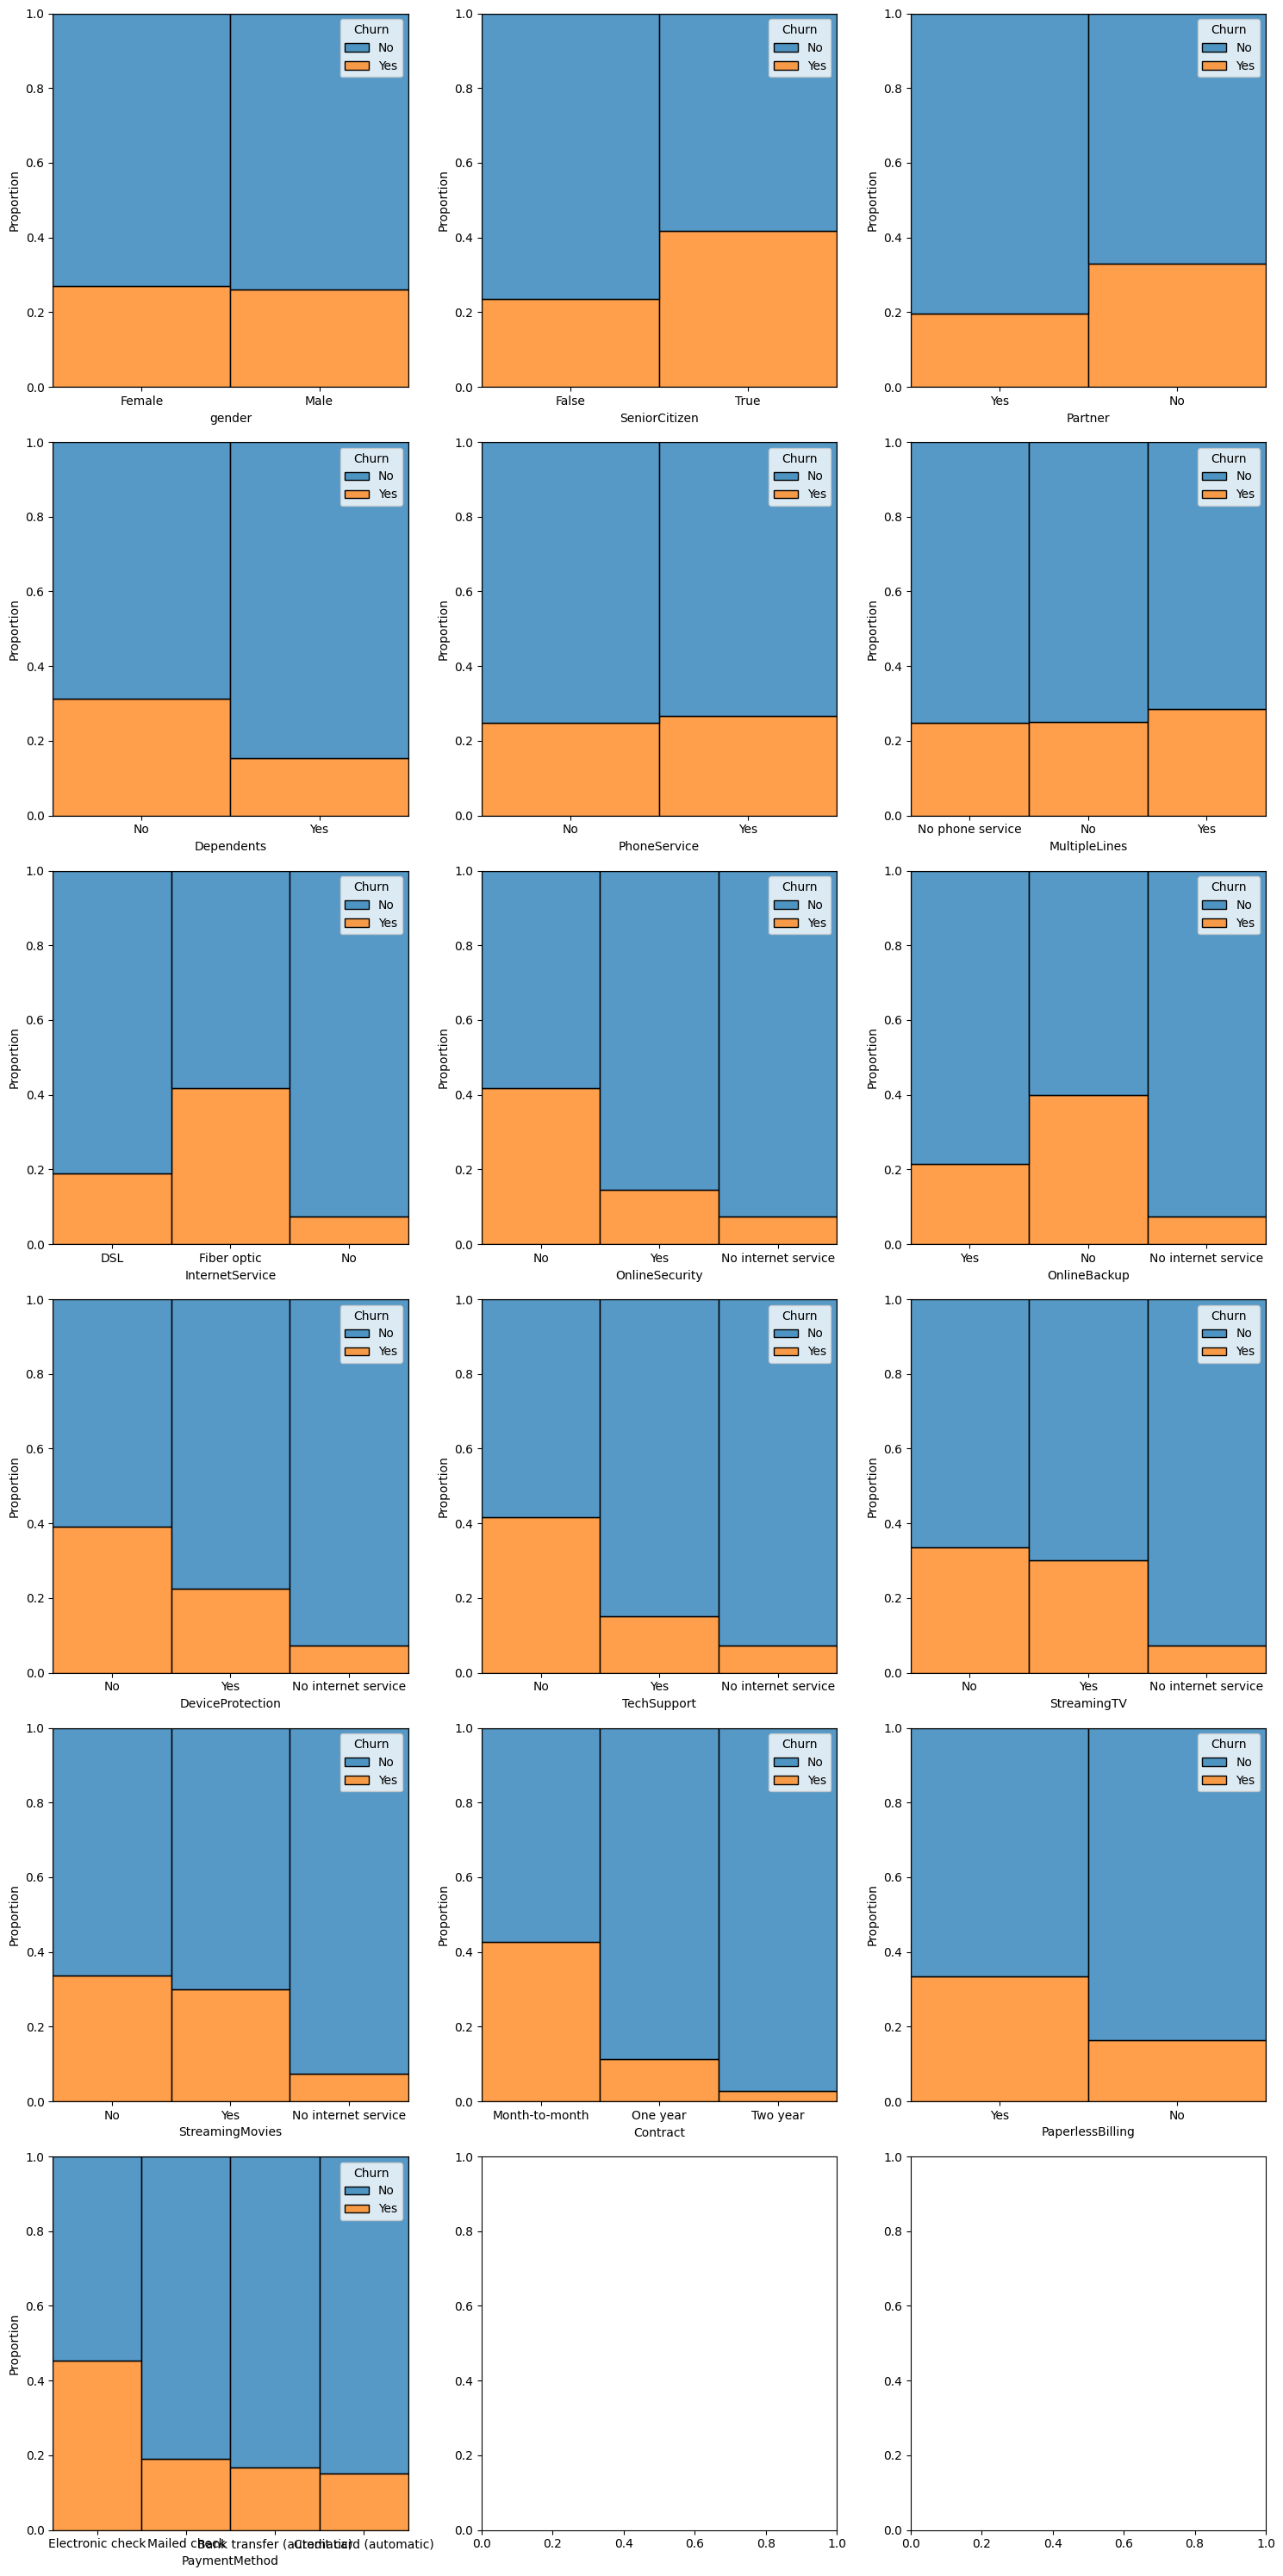

In [23]:
fig, axes = plt.subplots(
    ncols = 3,
    nrows = math.ceil(len(categorical_features[1:])/3),
    figsize = (5 * 3, 5 * math.ceil(len(categorical_features[1:])/3))
)

for ax, feature in zip(axes.flatten()[:len(categorical_features[1:])], categorical_features[1:]):
    sns.histplot(x=feature, hue=target, data=data, ax=ax, multiple="fill")
    ax.set_ylabel("Proportion")

fig.tight_layout()
plt.show()

For our categorical features, many of our features seem to have an impact on churn. Notable exceptions are:
* Gender
* Do they have phone service
* Do they have multiple lines

## Correlation and interaction effects

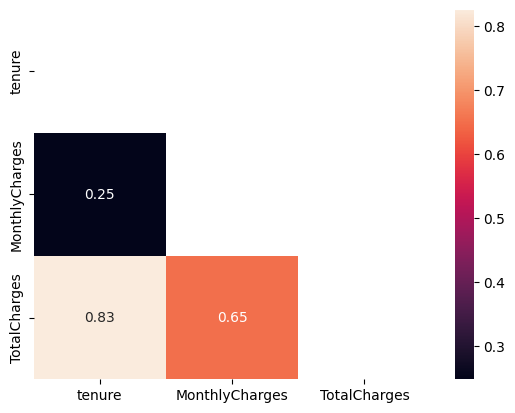

In [24]:
corr = data[numeric_features].corr() # Correlation between the numeric features

mask = np.triu(np.ones_like(corr)) # Just to get rid of the upper triangle part of the grid for visual purposes

sns.heatmap(corr,
            annot=True,
            mask=mask)

plt.show()

What we find is that unsurprisingly, tenure and total charges are strongly correlated. This is to be expected as the longer a customer is with TelCo, the more we'd expect them to have paid since they would be paying more often. Same with the correlation between total charges and monthly charges, the larger the monthly charge, the more total charges would build up

In [25]:
ct = pd.crosstab(data["Contract"], data[target])
print(ct)

Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48


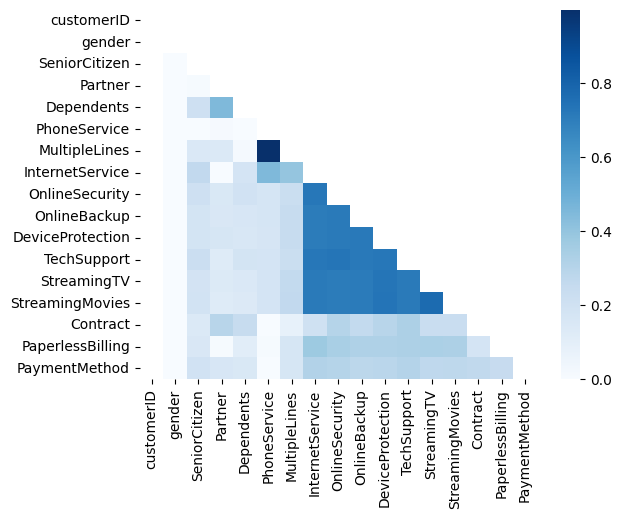

In [26]:
import scipy.stats as ss

# This function is a variant of the Cramer V statistic that is corrected for bias. It is a useful stat for determining correlation between 2 categorical features
# Returns a number in [0, 1]
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)

    # If one variable has only one category, association is undefined
    if confusion_matrix.shape[0] == 1 or confusion_matrix.shape[1] == 1:
        return np.nan

    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape

    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1))/(n - 1))
    rcorr = r - ((r - 1)**2)/(n - 1)
    kcorr = k - ((k - 1)**2)/(n - 1)

    denom = min((kcorr - 1), (rcorr - 1))
    if denom <= 0:
        return np.nan

    return np.sqrt(phi2corr / denom)

cramer_matrix = pd.DataFrame(
    index=categorical_features,
    columns=categorical_features,
    dtype=float
)

for col1 in categorical_features:
    for col2 in categorical_features:
        cramer_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])

mask = np.triu(np.ones_like(cramer_matrix)) | cramer_matrix.isna()

sns.heatmap(cramer_matrix,
            mask=mask,
            cmap="Blues")

plt.show()

We find a block of strongly correlated categorical features, visually set as big block of triangle above, what we find is that these are all the features that are linked to some sort of online activity. Considering that all these features are approximately equally correlated (except the streaming features are slightly more correlated), what is likely to be true is that if someone has access to online activities, say they have internet service with telco, they will have access to most other online features.

Finally we see a very strong correlation between phone service and multiple lines, once again unsurprising considering to have multiple lines, you need phone service. Considering how close the correlation is to 1, we find that most customers who have phone service, usually opt for multiple lines

Nothing else stands out much. a few more obvious correlations such as partner and dependents

### Interaction Effects

Likely Interaction effects:
Internet Service - Monthly Charges: As explained earlier, the bimodal distribution in MonthlyCharges - Churn could be due to the distributions of those with internet service and without

Contract Length - Monthly Charges: Also explained earlier, contract length could explain the bimodal distribution

Payment Method - Monthly Charges: I imagine that if a check is mailed every time, the customer is more likely to be sensitive to high monthly charges due to them seeing them more often

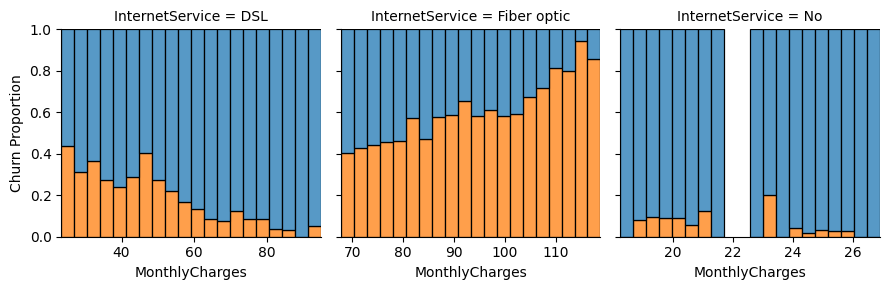

In [27]:
g = sns.FacetGrid(col="InternetService", data=data, sharex = False)
g.set_ylabels("Churn Proportion")
g.map_dataframe(sns.histplot, "MonthlyCharges", multiple="fill", hue=target, bins = 20)
plt.show()

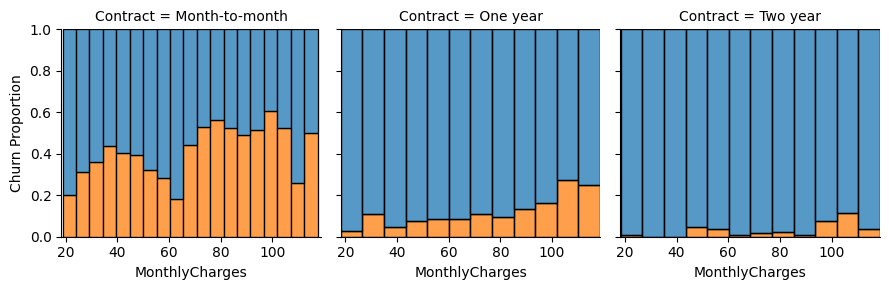

In [28]:
g = sns.FacetGrid(col="Contract", data=data)
g.set_ylabels("Churn Proportion")
g.map_dataframe(sns.histplot, "MonthlyCharges", multiple="fill", hue=target)
plt.show()

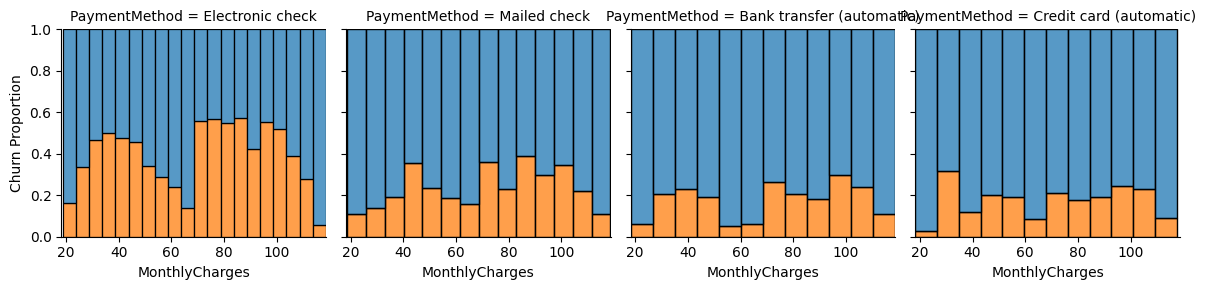

In [29]:
g = sns.FacetGrid(col="PaymentMethod", data=data)
g.set_ylabels("Churn Proportion")
g.map_dataframe(sns.histplot, "MonthlyCharges", multiple="fill", hue=target)
plt.show()

**Internet Service - Monthly Charges**
What we find is a clear interaction effect between internet service and monthly charges on churn, completely removing the bimodal distribution we find in the univariate analysis of monthly charges. We also see drastically different distributions between the different types of internet service, with monthly charges having a negative effect on churn with DSL internet service, and a positive effect on churn with fiber optic internet service.

This impact needs further analysis as the reason for this change in distribution is not obvious to me at first glance.

**Contract - Monthly Charges**
There does seem to possibly be an interaction effect here, as the bimodal distribution exists for month to month contracts and less obviously for year long contracts. If this interaction effect does exist, it seems unlikely to just be due to a correlation between contract and internet service as their Cramer-V stat is quite low. What seems equally likely though is that this is just due to low sample size in the year long and 2 year long contract lengths hiding the bimodal distribution, as there seems to be hints of what could be a bimodal distribution in the one year contract that may have just not shown at this sample size.

**Payment Method - Monthly Charges**
Sadly it is too hard to tell if there is an interaction effect here as though no distinct pattern seems to appear through faceting, the sample size for the churned non electronic check payment methods seems to be too small and thus too variable to see clear trends

#### Interaction effects alongside Tenure

Tenure is a structural feature (the survival time) of churn rate since tenure increases from 0 until churn, so in particular, analyzing how different features impact the distribution of churn rate over tenure would be very interesting.

The most interesting interaction effects would be using contract for one, since it could educate what kind of contracts we'd want to pursue and also monthly charges so we can understand whether or not having a high or low monthly charge affects the length of tenure.

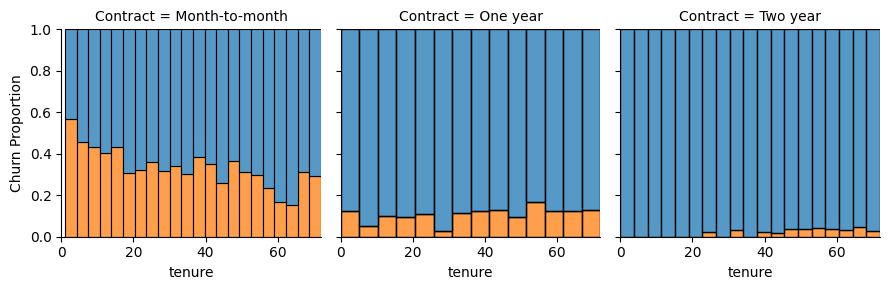

Sample size of Month-to-Month: 3875
Sample size of One year: 1473
Sample size of Two Year: 1695


In [30]:
g = sns.FacetGrid(col="Contract", data=data)
g.set_ylabels("Churn Proportion")
g.map_dataframe(sns.histplot, "tenure", multiple="fill", hue=target)
plt.show()

print("Sample size of Month-to-Month:", data[data.Contract == "Month-to-month"].shape[0])
print("Sample size of One year:", data[data.Contract == "One year"].shape[0])
print("Sample size of Two Year:", data[data.Contract == "Two year"].shape[0])


We do see that in month to month, the tenure does seem to have a noticeable negative effect on churn over time compared to in the one year and two year long contracts which seem broadly unchanging. I believe this might be due to a question of commitment and belief in product.

If a customer is in month-to-month, it may mean that they do not believe in the product enough to commit to a longer contract, as opposed to those in the year long and two year contracts who are likely to have already believed in the product enough. The longer the customer is on month-to-month, the idea that they do not believe in the product enough begins to fade, thus leading to a negative effect on churn. We wouldn't expect as much changes in belief each renewal of longer term contracts as the customer would've already had to have been pretty confident in the product.

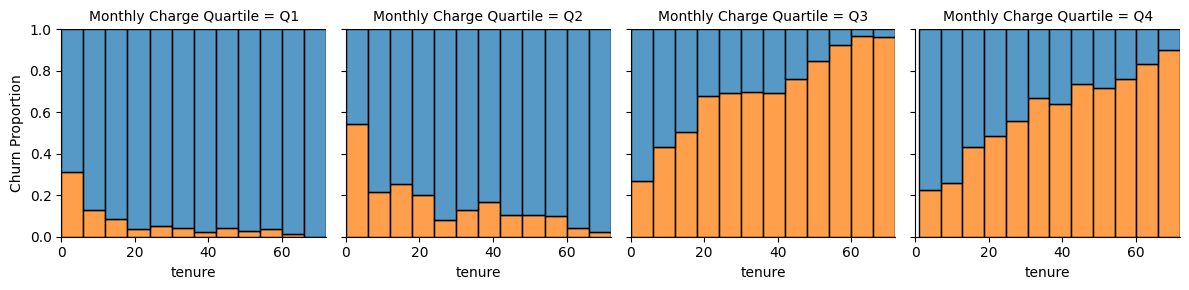

In [31]:
temp = data.copy()

temp["Monthly Charge Quartile"] = pd.qcut(data['MonthlyCharges'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

g = sns.FacetGrid(col="Monthly Charge Quartile", data=temp)
g.set_ylabels("Churn Proportion")
g.map_dataframe(sns.histplot, "tenure", multiple="fill", hue=target)
plt.show()

We find a very interesting and powerful interaction effect between monthly charge and tenure on the churn rate, with the churn rate decreasing over tenure in the first 2 quartiles of monthly charges, whereas that pattern flips completely in the second 2 quartiles of monthly charges.

It is difficult to determine the exact reason for this switch, a prevaling theory may be to take note of the fact that in the first 2 quartiles (first half) of the monthly charges, after the initial churn in customers, the churn rate is significantly lower than in the second half of monthly charges. This could imply that a solid interpretation could be that those in the first and second quartiles of monthly charges are simply receiving better value and therefore slowly settle into the product, whereas those in the higher quartiles are receiving poor value and therefore the longer their tenure, the more frustrated they become and thus churn increases (needs further investigating)

What this indicates is that we may indeed find that focusing on improving the quality of product for those in the higher quartiles, whether through simply lowering prices or improving quality could lead to big gains in reducing churn.

With our data being recognized as an instance of time-to-event data with churn rate being our hazard function, it's worth it to graph out our survival function as well

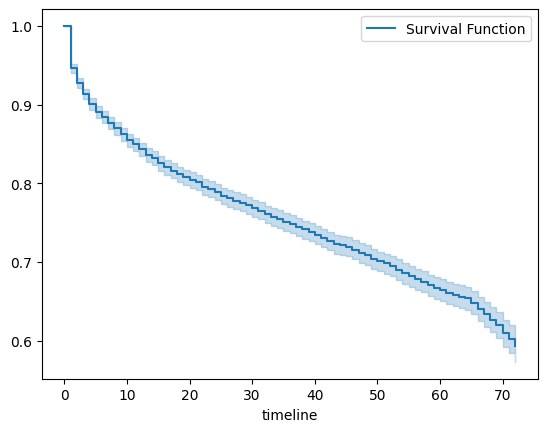

In [32]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter(label="Survival Function")

kmf.fit(durations=data["tenure"], event_observed=data["Churn"] == "Yes")

kmf.plot()
plt.show()

What we find is what we'd expect, a quick fall off in surival (paying customers) in the first few years, before stabilizing. What we find is that most customers remain unchurned even after 70 months.

## Key Insights

For our modelling, we must drop customerID, since it is a unique identifier, it will lead to overfitting

The features which seem to have the largest impact are:
* Tenure
* Monthly charges
* Contract type
* Internet service

**Tenure:**
The longer the tenure, the less likely the customer is to churn. This is likely due to the fact a longer term customer is more likely to still be a customer due to the fact the customer has decided it is a worthwhile investment, and also that the customer is less likely to think about the product and thus less likley to think about leaving

**Monthly Charges:**
The churn rate follows a bimodal distribution along monthly charges. After some analysis it seems like this is due to a confounding variable with internet service, with the monthly charges on fiber optic being on the higher end and therefore representing the second hump in the distribution, increasing the churn the higher the monthly charge. Whereas for DSL service, representing a lower cost and therefore the first hump, showing that the higher the monthly cost the lower the churn.

The reasons for this are difficult to fully understand but may due to a higher variation in quality offered in DSL, with higher monthly charges being linked to better more competitive DSL quality, whereas with fiber optic cables, the different in quality may be minimal while the higher cost becomes increasingly uncompetitive in the fiber optic market. Could use further investigation

**Contract Type:**
Those on a month-to-month exhibit a significantly larger churn rate compared to the one and two year contracts. This likely is due to varying levels of commitment and flexibility with switching, since month-to-month contracts likely indicate less certainty in the product and also are easier to leave.

**Internet Service:**
The stronger the internet service, the more likely to churn. Those on fiber optic connections have a higher churn rate than those on DSL which is higher than those without internet. This could be due to a confounding effects such as the demographics that would purchase internet are also more likely to switch around, or that internet is simply expensive and so with higher monthly charges we have higher churn.

The interaction effects which seem to have the msot potential are:
* Internet Service - Monthly Charges
* Tenure - Monthly Charges
* Tenure - Contract
* Contract - Monthly Charges

We also need to be aware of the fact that the following features don't seem to have a clear impact on churn when analyzing univariate distribution and also do not show up during initial investigations of interaction effects.
* Gender
* Do they have phone service
* Do they have multiple lines

I would however keep these features for now, but maintain awareness of this.

I would also remain cognisant of the fact that total charges seems to be equal to tenure * monthly charges and so may need to be dropped when using linear models

We also have a very clear interaction effect between internet service and monthly charges, this knowledge should be retained in the modelling.


In [33]:
data = data.drop("customerID", axis=1) # remove customerID
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,False,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,False,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,False,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,False,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,False,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.to_parquet("../data/processed.parquet", index=False) # Save processed data